## 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import kurtosis, skew, norm
import math
import statistics
from scipy.stats import chi2

pd.set_option('float_format', '{:.3f}'.format)

## 0.1 - HELPER FUNCTION (FUNÇÕES AUXILIARES)

## 0.2 - PATH DEFINITION

In [2]:
HOME_PATH = ''
RAW_DATA_PATH = ''
INTERIM_DATA_PATH = ''
FIGURE_PATH = ''

## 0.3 - LOAD DATA

In [3]:
base_fraude_raw1 = pd.read_csv('/home/valmir/Documentos/deteccao_fraude/data/raw/fraud_detection_dataset.csv')
base_fraude_raw1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9920.520,C764826684,0.000,0.000,M1940055334,0.000,0.000,0,0
1,1,PAYMENT,3448.920,C2103763750,0.000,0.000,M335107734,0.000,0.000,0,0
2,1,PAYMENT,4206.840,C215078753,0.000,0.000,M1757317128,0.000,0.000,0,0
3,1,PAYMENT,5885.560,C840514538,0.000,0.000,M1804441305,0.000,0.000,0,0
4,1,PAYMENT,5307.880,C1768242710,0.000,0.000,M1971783162,0.000,0.000,0,0


## 1.0 - DATA DESCRIPITION

In [4]:
#base_fraude_raw1 = base_fraude_raw2.copy()
#base_fraude_raw1.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw1.csv')

## 1.1 - DATA FIELD'S

Os dados contidos nesta base de dados são simulados e compreendem 30 dias. Estas transações podem ser de diferentes tipo e foram executadas via mobile devices. As features contidas nesta base de dados são:

 * `step` - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

 * `type`: Tipo: tipo de transação(depósito, saque, débito, pagamento e transferencia);

 * `amount`: Quantia: total que foi transacionado;

 * `nameOring`: ClienteOrigem: cliente que iniciou atransação;

 * `oldbalanceOrg`: SaldoInicialOrigem: saldo da conta de origem antes da transação;

 * `newbalanceOrig`: SaldoFinalOrigem: saldo da conta de origem depois da transação;

 * `nameDest`: ClienteDestino: cliente de destino da transação;

 * `oldbalandeDestino`: SaldoInicialDestino: saldo da conta destino antes da transação;

 * _`newbalanceDest`_: SaldoFinalDestino: saldo da conta destino depois da transação;

 * `isFraud`: Fraude: flag que define se a transação é fraudolenta ou não. Nesta simulação de fraude é a assumir se 'a conta do usuario foi   esvaziada e transferindo o dinherio para outra conta e depois sacado
 
 * `IssFlaggedFraud`: SinalizadaFraude: automaticamente categorizada como fraude pelo banco por fraude por tentar trasnferir mais de 200 mil em uma única conta


## 1.2 - RENAME COLUMNS

In [5]:
base_fraude_raw1.rename(columns={'step':'Passos', 'type':'Tipo', 'amount': 'Quantia',
                                'nameOrig':'ClienteOrigem', 'oldbalanceOrg': 'SaldoInicalOrig',
                                'newbalanceOrig':'SaldoFinalOrig', 'nameDest':'ClienteDest',
                                'oldbalanceDest':'SaldoInicialDest', 'newbalanceDest':'SaldoFinalDest',
                                'isFraud':'Fraude', 'isFlaggedFraud':'SinalizadaFraude'}, inplace=True)
base_fraude_raw1.dtypes

Passos                int64
Tipo                 object
Quantia             float64
ClienteOrigem        object
SaldoInicalOrig     float64
SaldoFinalOrig      float64
ClienteDest          object
SaldoInicialDest    float64
SaldoFinalDest      float64
Fraude                int64
SinalizadaFraude      int64
dtype: object

### 1.2.1 - DEFINE TYPES FEATURES

In [6]:
base_fraude_categoria = base_fraude_raw1[['Tipo','ClienteDest', 'ClienteOrigem']].astype('category')

## 1.3 - DATA DIMENSIONS

In [7]:
num_linhas, num_colunas = base_fraude_raw1.shape

print('Numero de linhas', num_linhas)
print('Numero de colunas', num_colunas)

Numero de linhas 557123
Numero de colunas 11


## 1.4 - DATA TYPE

In [8]:
base_fraude_raw1.dtypes

Passos                int64
Tipo                 object
Quantia             float64
ClienteOrigem        object
SaldoInicalOrig     float64
SaldoFinalOrig      float64
ClienteDest          object
SaldoInicialDest    float64
SaldoFinalDest      float64
Fraude                int64
SinalizadaFraude      int64
dtype: object

## 1.5 CHANGE TYPE

#### Não houve nenhuma mudança nos tipos de variaveis nessa etapa, pois todas as features se encontravam com seus tipos bem definidos

## 1.6 - CHECK N.A.

### Não foi encontrado nenhum valor nulo nesse Dataset

In [9]:
base_fraude_raw1.isnull().sum()

Passos              0
Tipo                0
Quantia             0
ClienteOrigem       0
SaldoInicalOrig     0
SaldoFinalOrig      0
ClienteDest         0
SaldoInicialDest    0
SaldoFinalDest      0
Fraude              0
SinalizadaFraude    0
dtype: int64

In [10]:
base_fraude_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557123 entries, 0 to 557122
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Passos            557123 non-null  int64  
 1   Tipo              557123 non-null  object 
 2   Quantia           557123 non-null  float64
 3   ClienteOrigem     557123 non-null  object 
 4   SaldoInicalOrig   557123 non-null  float64
 5   SaldoFinalOrig    557123 non-null  float64
 6   ClienteDest       557123 non-null  object 
 7   SaldoInicialDest  557123 non-null  float64
 8   SaldoFinalDest    557123 non-null  float64
 9   Fraude            557123 non-null  int64  
 10  SinalizadaFraude  557123 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 46.8+ MB


## 1.7 - FILL OUT N.A.

### Não havendo nenhum valor faltante nesse Dataset, não foi nescessario nenhum metodo de preenchimento ou exclusão dos mesmos

## 1.8 DISCRIPTIVE STATISTICAL

Medidas de tendencia central - 
 - Media
 - Mediana
 

Medidas de Dispersão

- Skewness
- Kurtosis
- Desvio Padrão
- Range (alcance)
- Min
- Max

### MEDIDAS DE TENDENCIA CENTRAL

In [11]:
# Medidas de Tendencia - Media e Mediana
tendencia = base_fraude_raw1['Quantia'].describe().loc[['mean', '50%']]
print(tendencia)


mean   163897.761
50%     74913.810
Name: Quantia, dtype: float64


### MEDIDAS DE DISPERSÃO

#### Kurtosis e Skewness 
* `Kurtosis ou Curtose`- A kurtosis é uma medida estatística que descreve a forma da distribuição dos dados em relação à sua média. Ela mede o grau de concentração dos valores em torno da média.

* `Skeeness ou Assimetria`- A skewness, também conhecida como assimetria, é uma medida estatística que descreve a simetria da distribuição dos dados. Ela mede o grau de desvio da distribuição em relação à sua média

In [12]:
# DEVIDO AOS DADOS DA FEATURE 'QUANTIA' SEREM MUITOS ASSIMETRICOS E ELEVADOS, IREMOS TRABALHAS COM REDUZÃO DE VALORES

selected_feature = base_fraude_raw1['Quantia']<= 250000

In [13]:
kurt = kurtosis(selected_feature)
skewness = skew(selected_feature)
print(kurt)
print(skewness)

0.10292899945066791
-1.450147923299781


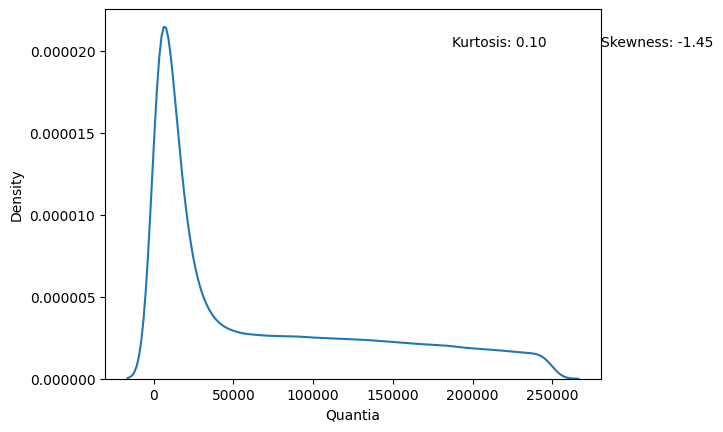

In [14]:
sns.kdeplot(data=base_fraude_raw1[base_fraude_raw1.Quantia <= 250000], x='Quantia')
plt.text(0.7, 0.9, f'Kurtosis: {kurt:.2f}', transform=plt.gca().transAxes)
plt.text(1, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.ticklabel_format(style='plain', axis='y')

##### Resultados Kurtosis e Skewness 
* `Kurtosis ou Curtose`- Encontramos o tipo Leptokurtic tem caudas muito longas e finas, o que significa que há mais chances de outliers. Sendo o excesso de curtose positivo

* `Skeeness ou Assimetria`- Distribuições com assimetria positiva ou à direita - É um tipo de distribuição em que as medidas são dispersas, ao contrário dos dados distribuídos simetricamente, em que todas as medidas de tendência central (média, mediana e moda) são iguais. 

## 1.8 DISCRIPTIVE SATATISTICAL

### 1.8.1 - NUMERIC ESTATISTIC

In [15]:
base_fraude_raw1.Quantia.describe()

count     557123.000
mean      163897.761
std       275458.172
min            0.100
25%        11915.585
50%        74913.810
75%       215581.560
max     10000000.000
Name: Quantia, dtype: float64

In [16]:
base_fraude_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557123 entries, 0 to 557122
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Passos            557123 non-null  int64  
 1   Tipo              557123 non-null  object 
 2   Quantia           557123 non-null  float64
 3   ClienteOrigem     557123 non-null  object 
 4   SaldoInicalOrig   557123 non-null  float64
 5   SaldoFinalOrig    557123 non-null  float64
 6   ClienteDest       557123 non-null  object 
 7   SaldoInicialDest  557123 non-null  float64
 8   SaldoFinalDest    557123 non-null  float64
 9   Fraude            557123 non-null  int64  
 10  SinalizadaFraude  557123 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 46.8+ MB


`OUTILERS`

* Como há muitos outliers, com valores bem altos, fica difícil visualizar as distribuições dos dados. Uma alternativa é modificar os limites dos valores. Abaixo iremos trabalhar com valores iguais ou menores que 500.000 (quinhetos mil)


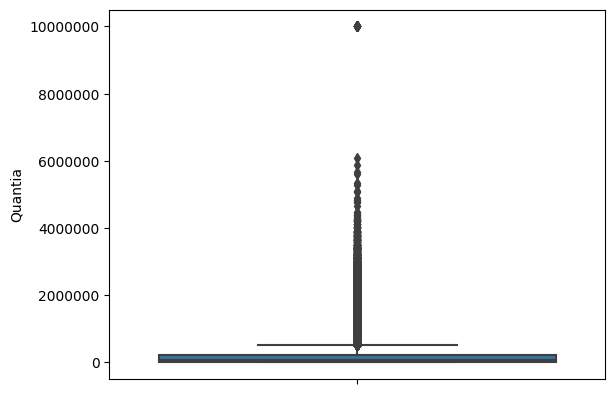

In [18]:
sns.boxplot(data=base_fraude_raw1, y="Quantia")
plt.ticklabel_format(style='plain', axis='y')

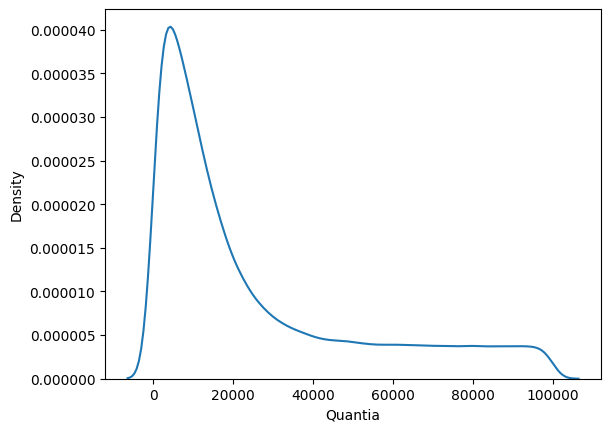

In [19]:
sns.kdeplot(data=base_fraude_raw1[base_fraude_raw1.Quantia <= 100000], x='Quantia')
plt.ticklabel_format(style='plain', axis='y')

`O QUE SIGNIFICA A FEATURE PASSOS`

* Um mes possui, tirando a media anual, 31 dias. Essa feature exemplifica o tempo entre a transação anterior e a proxima. 
    Exemplo: 31 dias multiplicado por 24 horas(tempo em horas de um dia) teremos 744 horas.

<Axes: xlabel='Passos', ylabel='Quantia'>

/home/valmir/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/valmir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


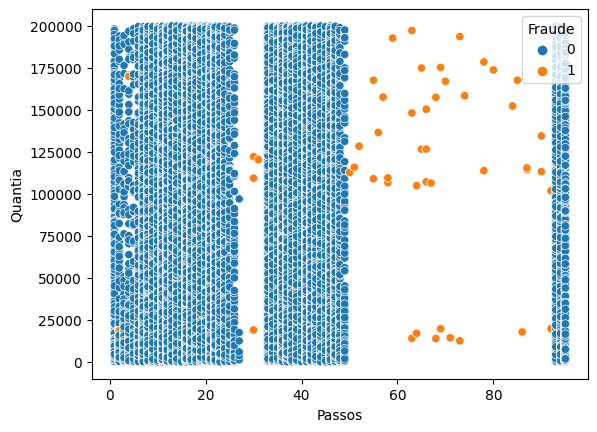

In [20]:
sns.scatterplot(data=base_fraude_raw1[base_fraude_raw1.Quantia <= 200000],y='Quantia',x='Passos', hue= 'Fraude' )


### 1.8.2 - CATEGORICAL ATRIBUTES



In [36]:
base_fraude_categoria.describe(include=['category'])

,Tipo,ClienteDest,ClienteOrigem
count,557123,557123,557123
unique,5,269195,557054
top,CASH_OUT,C2083562754,C1389563190
freq,236289,60,2


In [26]:
base_fraude_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557123 entries, 0 to 557122
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Tipo           557123 non-null  category
 1   ClienteDest    557123 non-null  category
 2   ClienteOrigem  557123 non-null  category
dtypes: category(3)
memory usage: 35.3 MB


`VALORES UNICOS DOS TIPOS DE PAGAMENTOS`

In [25]:
base_fraude_categoria['Tipo'].unique()

['PAYMENT', 'CASH_OUT', 'TRANSFER', 'DEBIT', 'CASH_IN']
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

`QUANTIDADE DE TRANSAÇÕES POR TIPO DE TRANSAÇÃO`

* O CASH_OUT ou SAQUE é o tipo de transação mais efetuado e o pagamento em Debito, quando essa base fou disponibilizada, é a Tipo de menor transação.

In [29]:
base_fraude_categoria['Tipo'].value_counts()

Tipo
CASH_OUT    236289
PAYMENT     191938
CASH_IN      67939
TRANSFER     57895
DEBIT         3062
Name: count, dtype: int64

`QUAL O VALOR EM MEDIA FOI GASTO, AGRUPADO PELO TIPO DE PAGAMENTO?`
 * Verificamos que existe uma preferencia maior em efetuar os pagamentos em TRANSFERENCIA e pouco usado o método de pagamento DEBITO

In [31]:
base_fraude_raw1.groupby(['Tipo']).Quantia.mean().sort_values(ascending=False)

Tipo
TRANSFER   610127.082
CASH_OUT   178623.825
CASH_IN    171136.719
PAYMENT     11124.781
DEBIT        6183.601
Name: Quantia, dtype: float64

`MEDIA DE QUANTIDADE DE TRANSAÇÕES POR CLIENTES`

* Verificamos que não passa de 2 transações nesse periodo de 31 dias por Cliente

In [35]:
base_fraude_categoria['ClienteOrigem'].value_counts()[:10]

ClienteOrigem
C1389563190    2
C1794437297    2
C688001520     2
C199116739     2
C400247231     2
C262409479     2
C133857826     2
C97518633      2
C1446329068    2
C1056260641    2
Name: count, dtype: int64

`NO GRAFICO ABAIXO PODEMOS VISUALIZAR MELHOR A CONSIDERAVEL DIFERENÇA DO TIPO TRANSACIONAL MAIS UTILIZADO, MO MOMENTO QUE ESSES DADOS FORAM COLETADOS`

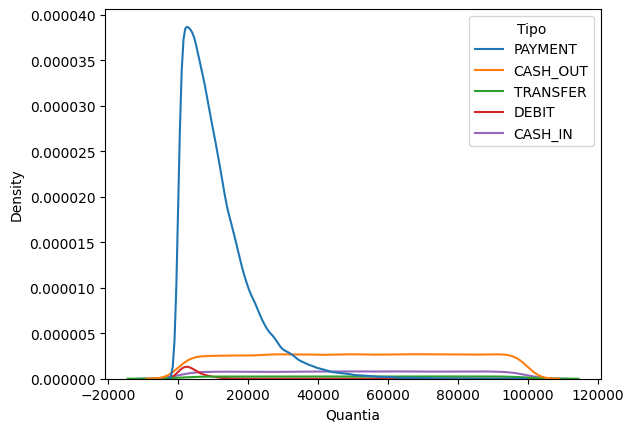

In [21]:
sns.kdeplot(data=base_fraude_raw1[base_fraude_raw1.Quantia <= 100000], x='Quantia', hue='Tipo')
plt.ticklabel_format(style='plain', axis='y')
